---
title: "Winning with Simple, not even Linear Time-Series Models"
author: "Sarem"
date: "2023-05-10"
categories: [Time Series]
format:
  html:
    toc: true
    toc-location: left
    toc-depth: 2
    toc-title: Contents
description-meta: "We consider almost trivially simple models. If your dataset is small, the subsequent ideas might be useful."
---

## Introduction

Disclaimer: Title heavily inspired by [this](https://www.youtube.com/watch?v=68ABAU_V8qI&pp=ygUad2lubmluZyB3aXRoIHNpbXBsZSBtb2RlbHM%3D&ref=sarem-seitz.com) great talk.

As the name implies, today we want to consider almost trivially simple models. Although the current trend points towards complex models, even for time-series models, I am still a big believer in simplicity. In particular, when your dataset is small, the subsequent ideas might be useful.

To be fair, this article will probably be most valuable for people who are just starting out with time-series analysis. Anyone else should check the table of contents first and decide for themselves if they want to continue.

Personally, I am still quite intrigued by how far you can push even the most simplistic time-series models. The upcoming paragraphs show some ideas and thoughts that I have been gathering on the topic over time.

## Models with pure i.i.d. noise
We start with the simplest (probabilistic) way to model a (univariate) time-series. Namely, we want to look at plain *i*ndependently, *i*dentically, *d*istributed randomness:
$$
\begin{gathered}
y_t=\epsilon_t \\
\epsilon_t \sim\text{ some distribution}
\end{gathered}
$$
This implies that all our observations follow the same distribution at any point in time (**identically** distributed). Even more importantly, we presume no interrelation between observations at all (**independently** distributed). Obviously, this precludes any autoregressive terms as well.

Probably your first question is if such models aren't too simplistic to be useful for real-world problems. Certainly, most time-series are unlikely to have no statistical relationship with their own past.

While those concerns are true by all means, we can nevertheless deduce the following:

> Any time-series model that is more complex than a pure-noise model should also produce better forecasts than a pure-noise model.

In short, we can at least use random noise as a benchmark model. There is arguably no simpler approach to create baseline benchmarks than this one. Even smoothing techniques will likely require more parameters to be fitted.

Besides this rather obvious use-case, there is another potential application for i.i.d. noise. Due to their simplicity, noise models cand be useful for very small datasets. Consider this: If big, complex models require large datasets to prevent overfitting, then simple models require only a handful of data.

Of course, it is debatable what dataset size can be seen as 'small'.

## Integrated i.i.d. noise
Now, things are becoming more interesting. While raw i.i.d. noise cannot account for auto-correlation between observations, integrated noise can. Before we do a demonstration, let us introduce the differencing operator:
$$
\Delta_s y_t=y_t-y_{t-s}
$$
If you haven't heard about differencing for time-series problems yet - great! If you have, then you can hopefully still learn something new.

### Definition of an integrated time-series
With the difference operator in our toolbox, we can now define an integrated time-series

> *A time-series $y_t$ is said to be integrated of order $p$ with seasonality $s$ if $\Delta_s^p y_t$ is a stationary time-series.*

There are several ideas in this definition that we should clarify further:

First, you probably noticed the concept of exponentiating the difference operator. You can simply think of this as performing the differentiation several times. For the squared difference operator, this would look as follows:
$$
\begin{gathered}
\Delta_1^2 y_t=\Delta_1\left(\Delta_1 y_t\right)=\Delta_1\left(y_t-y_{t-1}\right) \\
=\left(y_t-y_{t-1}\right)-\left(y_{t-1}-y_{t-2}\right) \\
\Delta_1 \Delta_1 y_t .
\end{gathered}
$$
As we will see, multiple difference operators allow us to handle different time-series patterns at once.

Third, it is common convention to simply write
$$
\Delta y_t \text { if } s=1 \text {. }
$$
We will happily adopt this convention here. Also, we call such time-series simply integrated without referencing its order or seasonality.

Obviously, we also need to re-transform a difference representation back to its original domain. In our notation, this means we invert the difference transformation, i.e.
$$
\Delta^{-1} \Delta y_t=y_t
$$
must hold for arbitrary difference transformations. If we expand this formula, we get
$$
\begin{gathered}
\Delta^{-1} \Delta y_t=y_t \\
\Leftrightarrow \Delta^{-1} \Delta y_t=y_t \\
\Leftrightarrow \Delta^{-1}\left(y_t-y_{t-1}\right)=y_t \\
\Leftrightarrow\left(y_t-y_{t-1}\right)=\Delta y_t \\
\Leftrightarrow y_t=y_{t-1}+\Delta y_t
\end{gathered}
$$
These simplifications follow from the fact the difference operator is a linear operator (we won't cover the details here). Technically, the last equation merely says that the next observation is a sum of this observation plus a delta.

In a forecasting problem, we will typically have a prediction for the change
$$
\Delta y_t.
$$
Let's denote this prediction as
$$
\Delta \hat{y}_t
$$
to stress that it is not the actual change, but a predicted one. Thus, the forecast for the integrated time-series is
$$
\hat{y}_t=y_{t-1}+\Delta \hat{y}_t.
$$
Afterwards, we apply this logic recursively as far into the future as our forecast should go:
$$
\hat{y}_{t+h}=\hat{y}_{t+h-1}+\Delta \hat{y}_{t+h}
$$
![White noise time-series (left) and corresponding integrated time-series (right). Both time-series are related via the simple difference operator and its inverse.](/images/winning-with-simple-not-even-linear-time-series-models/nonintegrated_vs_integrated.png){fig-alt="White noise time-series (left) and corresponding integrated time-series (right)."}

## Integrated noise for seemingly complex patterns
By now, you can probably imagine what is meant by an integrated noise model. In fact, we can come up with countless variants of an integrated noise model by just chaining some difference operators with random noise.

### Linear trends from integrated time-series
One possibility would be a simply integrated time-series, i.e.

$$
\begin{gathered}
\Delta y_t=\epsilon_t\\
\epsilon_t \sim\text{ some distribution}
\end{gathered}
$$
It is an interesting exercise to simulate data from such a model using a plain standard normal distribution.

As it turns out, samples from this time-series appear to exhibit linear trends with potential change points. However, it is clear that these trends and change points occur completely at random.

This implies that simply fitting piece-wise linear functions to forecast such trends can be a dangerous approach. After all, if the changes are occurring at random, then all linear trend lines are mere artifacts of the random data-generating process.

As an important disclaimer, though, 'unpredictable' means unpredictable from the time-series itself. An external feature might still be able to accurately forecast potential change points. Here, however, we presume that the time-series is our solely available source of information.

Below, you can see an example of the described phenomenon. While there appears to be a trend change at around t=50, this change is purely random. The upward trend after t=50 also stalls at around t=60. Imagine how your model would have performed if you extrapolated the upward trend after t=60.

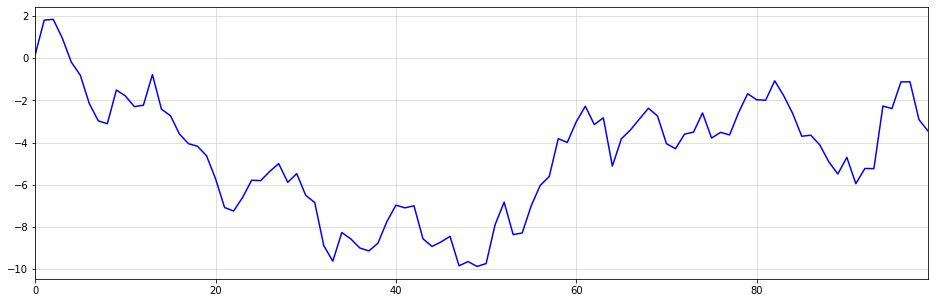

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

plt.figure(figsize = (16,5))
plt.plot(np.cumsum(np.random.normal(size = 100)),color="blue")
plt.margins(x=0)
plt.grid(alpha=0.5);

Of course, the saying goes 'never say never', even in those settings. However, you should really know what you are doing if you apply such models.

### Seasonal patterns
Similarly to how a simple integration produceds trends, we can also create seasonal patterns:

Formally, we now need the s-th difference of our seasonal  process to be a stationary process, e.g.
$$
\begin{gathered}
\Delta_s y_t=\epsilon_t\\
\epsilon_t \sim\text{ some distribution}
\end{gathered}
$$
The inverse operation - transforming the i.i.d. process back to the seasonally integrated - works similarly to the one before:
$$
\hat{y}_t=y_{t-s}+\Delta_s \hat{y}_t
$$
You can think of the inverse operation of seasonal differencing as a cumsum operation over s periods. Since I am not aware of a respective, native Python function, I decided to do `reshape->cumsum->reshape` to get the desired outcome. Below is an example with $s=4$:

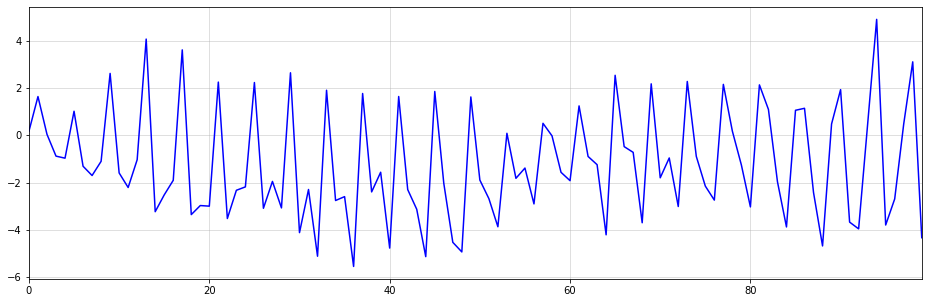

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

white_noise = np.random.normal(size = (100))
seasonal_series = np.cumsum(white_noise.reshape((25,4)),0).reshape(-1)

plt.figure(figsize = (16,5))
plt.plot(seasonal_series,color="blue")
plt.margins(x=0)
plt.grid(alpha=0.5);

As you can see, the generated time-series looks reasonably realistic. We could easily sell this as quarterly sales numbers of some product to an unsuspecting Data Scientist.

We could even combine both types of integration to generate a seasonal time-series with trending behavior:

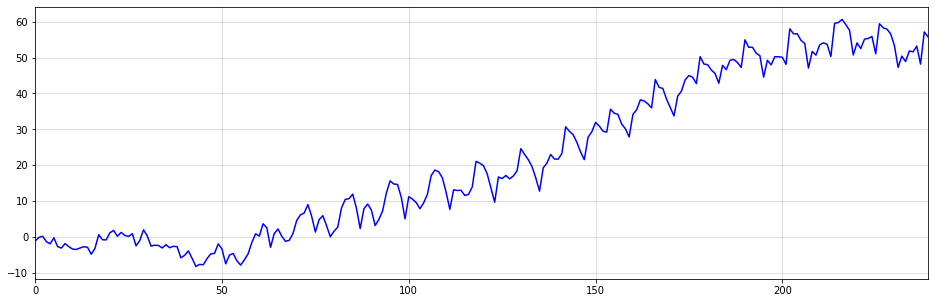

In [4]:
import matplotlib.pyplot as plt

np.random.seed(123)

white_noise = np.random.normal(size = (240))
integrated_series = np.cumsum(np.cumsum(white_noise.reshape((20,12)),0).reshape(-1))

plt.figure(figsize = (16,5))
plt.plot(integrated_series,color="blue")
plt.margins(x=0)
plt.grid(alpha=0.5);

At this point, you will probably realize that the title of this article was a little click-baity. Integrated time-series are, in fact, purely linear models. However, I believe that most people wouldn't consider a model with, more-or-less, zero parameters a typical linear model.

### Memory effects through integration
Another interesting property of integrated time-series is the ability to model memory effects.

This effect can be seen particularly well when there are larger shocks or outliers in our data. Consider the below example, which shows seasonal integration of order $s=12$ over i.i.d. draws from a standard [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution?ref=sarem-seitz.com):

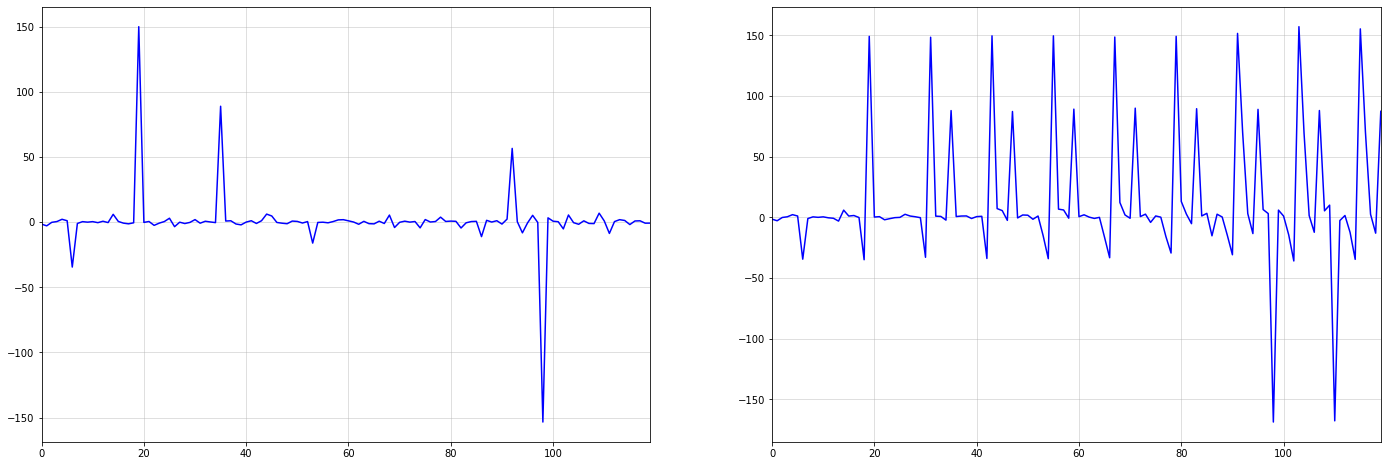

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(987)

#cauchy distribution is equivalent to a Student-T with 1 degree of freedom
#see https://stats.stackexchange.com/questions/151854/a-normal-divided-by-the-sqrt-chi2s-s-gives-you-a-t-distribution-proof
heavy_tailed_noise = np.random.normal(size = (120))/np.sqrt(np.random.normal(size = (120))**2)
seasonal_series = np.cumsum(heavy_tailed_noise.reshape((10,12)),0).reshape(-1)

fig, axs = plt.subplots(figsize = (24,8), nrows=1, ncols=2)


axs[0].plot(heavy_tailed_noise,color="blue")
axs[0].margins(x=0)
axs[0].grid(alpha=0.5)

axs[1].plot(seasonal_series,color="blue")
axs[1].margins(x=0)
axs[1].grid(alpha=0.5);

The first large shock in the i.i.d. Cauchy series at around t=20 is sustained over the whole integrated series on the right. Over time, more shocks occur, which are also sustained.

This memory property can be very useful in practice. For example, the economic shocks from the pandemic have caused persistent changes in many time-series.

## Benchmarking against NBEATS and NHITS
Let us now use the AirPassengers dataset from Nixtla's [neuralforecast](https://github.com/Nixtla/neuralforecast?ref=sarem-seitz.com)  for a quick evaluation of the above ideas. If you are regularly reading my articles, you might remember the general procedure from [this one](https://www.sarem-seitz.com/facebook-prophet-covid-and-why-i-dont-trust-the-prophet/#:~:text=even%20simpler%20forecast-,model,-As%20you%20might).

First, we split the data into a train and test period, with the latter consisting of 36 months of data:

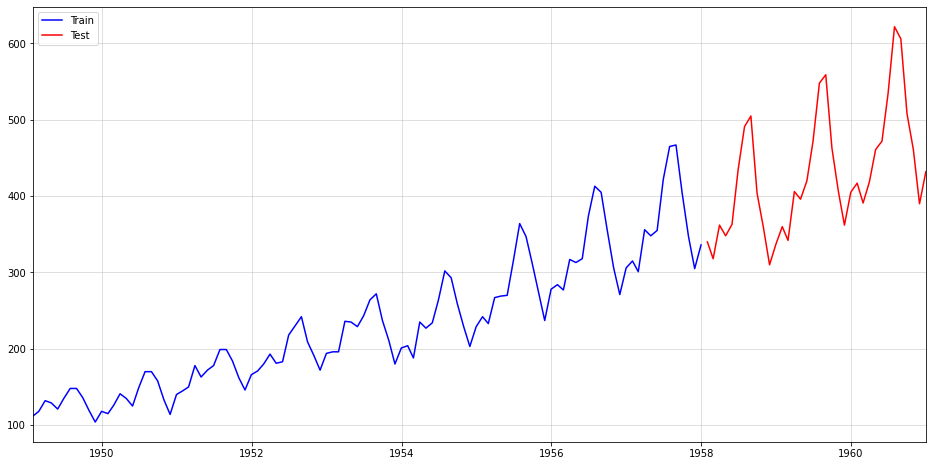

In [6]:
import pandas as pd
from neuralforecast.utils import AirPassengersDF

df = AirPassengersDF.iloc[:,1:]
df.columns = ["date","sales"]
df.index = pd.to_datetime(df["date"])

sales = df["sales"]

train = sales.iloc[:-36]
test = sales.iloc[-36:]


plt.figure(figsize = (16,8))
plt.plot(train,color="blue",label="Train")
plt.plot(test,color="red",label="Test")
plt.legend()
plt.margins(x=0)
plt.grid(alpha=0.5);

In order to obtain a stationary, i.i.d. series we perform the following transformation:
$$
\epsilon_t=\Delta \Delta_{12} \sqrt{y_t}
$$
First, the square-root stabilizes the increasing variance. The two differencing operators then remove seasonality and trend. For the respective re-transformation, check the code further down below.

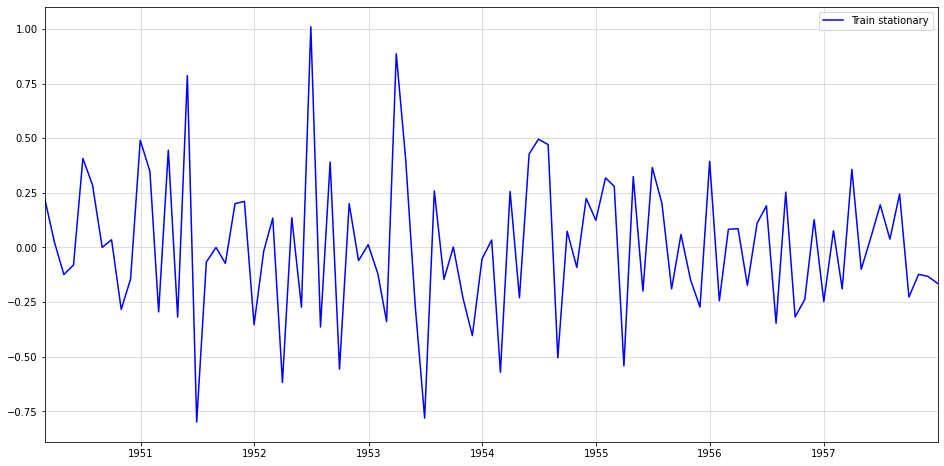

In [8]:
rooted = np.sqrt(train)
diffed = rooted.diff(1)
diffed_s = diffed.diff(12).dropna()

plt.figure(figsize = (16,8))
plt.plot(diffed_s,color="blue",label="Train stationary")
plt.legend()

plt.margins(x=0)
plt.grid(alpha=0.5);

We can also check a histogram and density plot of the stabilized time-series:

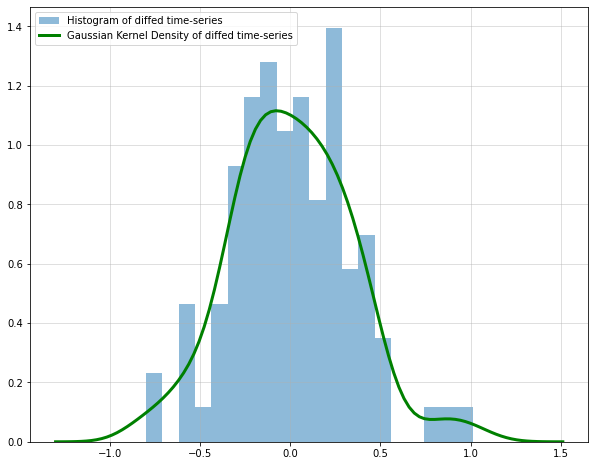

In [9]:
from scipy.stats import gaussian_kde

plt.figure(figsize = (10,8))
plt.grid(alpha = 0.5)
plt.hist(diffed_s,bins=20,density = True,alpha=0.5, label = "Histogram of diffed time-series")

kde = gaussian_kde(diffed_s)

target_range = np.linspace(np.min(diffed_s)-0.5,np.max(diffed_s)+0.5,num=100)

plt.plot(target_range, kde.pdf(target_range),color="green",lw=3, label = "Gaussian Kernel Density of diffed time-series")

plt.legend();

Our stationary series looks also somewhat normally distributed, which is always a nice property.

Now, let us create the forecast for the test period. Presuming that we don't know the exact distribution of our i.i.d. series, we simply draw from the empirical distribution via the training data. Hence, we simulate future values by reintegrating random samples from the empirical data:

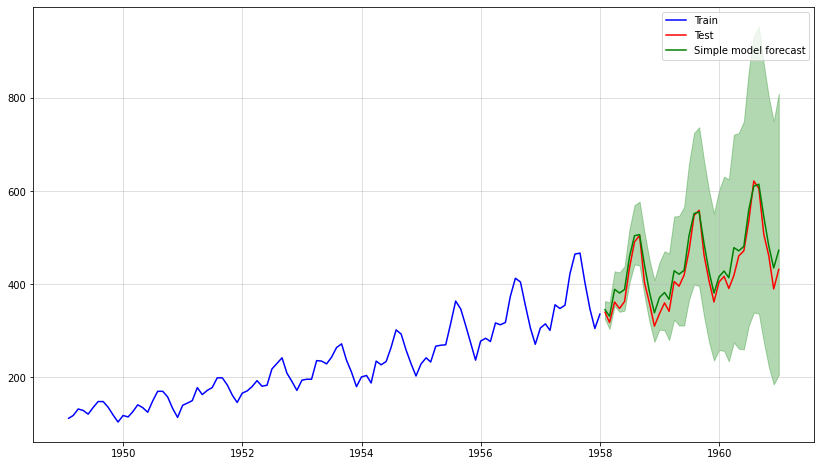

In [10]:
full_sample = [] 

np.random.seed(123)

for i in range(10000):
    draw = np.random.choice(diffed_s,len(test))
    result = list(diffed.iloc[-12:].values)

    for t in range(len(test)):
        result.append(result[t]+draw[t])

    full_sample.append(np.array(((rooted.iloc[-1])+np.cumsum(result[12:]))**2).reshape(-1,1))

    
reshaped = np.concatenate(full_sample,1)
result_mean = np.mean(reshaped,1)
lower = np.quantile(reshaped,0.05,1)
upper = np.quantile(reshaped,0.95,1)


plt.figure(figsize = (14,8))
plt.plot(train, label = "Train",color="blue")
plt.plot(test, label = "Test",color="red")
plt.grid(alpha = 0.5)

plt.plot(test.index, result_mean,label = "Simple model forecast",color="green")
plt.legend()
plt.fill_between(test.index,lower,upper,alpha=0.3,color="green");

This looks very good - the mean forecast is very close to the test data. In addition, our simulation allows us to empirically sample the whole forecast distribution. Therefore, we can also easily add confidence intervals.

Finally, let us see how our approach compares against rather complex time-series models. To do so, I went with Nixtla's implementation of [NBEATS](https://arxiv.org/abs/1905.10437?ref=sarem-seitz.com) and [NHITS](https://arxiv.org/abs/2201.12886?ref=sarem-seitz.com):

In [11]:
from copy import deepcopy
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

train_nxt = pd.DataFrame(train).reset_index()
train_nxt.columns = ["ds","y"]
train_nxt["unique_id"] = np.ones(len(train))

test_nxt = pd.DataFrame(test).reset_index()
test_nxt.columns = ["ds","y"]
test_nxt["unique_id"] = np.ones(len(test))


horizon = len(test_nxt)
models = [NBEATS(input_size=2 * horizon, h=horizon,max_epochs=50),
          NHITS(input_size=2 * horizon, h=horizon,max_epochs=50)]

nf = NeuralForecast(models=models, freq='M')
nf.fit(df=train_nxt)
Y_hat_df = nf.predict().reset_index()


nbeats = Y_hat_df["NBEATS"]
nhits = Y_hat_df["NHITS"]


rmse_simple = np.sqrt(np.mean((test.values-result_mean)**2))
rmse_nbeats = np.sqrt(np.mean((test.values-nbeats.values)**2)) 
rmse_nhits = np.sqrt(np.mean((test.values-nhits.values)**2))

pd.DataFrame([rmse_simple,rmse_nbeats,rmse_nhits], index = ["Simple", "NBEATS", "NHITS"], columns=["RMSE"])

Global seed set to 1
Global seed set to 1


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

,RMSE
Simple,25.502159
NBEATS,44.069832
NHITS,62.713951


As we can see, our almost trivial model has beaten two sophisticated time-series models by a fair margin. Of course, we need to emphasize that this doesn't allow to draw any general conclusions.

Rather, I'd expect the neural models to outperform our simple approach for larger datasets. Nevertheless, as a benchmark, those trivial models are always a worthwhile consideration.

## Takeaways - What do we make of this?
As stated multiple times throughout this article:

> A seemingly complex time-series could still follow a fairly simple data-generating process.

In the end, you might spend hours trying to fit an overly complex model even though the underlying problem is almost trivial. At some point, somebody could come along, fit a simple ARIMA(1,0,0), and still outperform your sophisticated neural model.

To avoid the above worst-case scenario, consider the following idea:

> When starting out with a new time-series problem, always start with the simplest possible model and use it as a benchmark for all other models.

Although this is common knowledge in the Data Science community, I feel like it deserves particular emphasis in this context. Especially due to nowadays' (to some extent justified) hype around Deep Learning, it can be tempting to directly start with something fancy.

For many problems, this might just be the right way to go. Nobody today would consider a Hidden Markov Model for NLP today when LLM embeddings are available almost for free now.

Once your time-series becomes large, however, modern Machine Learning will likely be better. In particular, [Gradient Boosted Trees](https://lightgbm.readthedocs.io/en/v3.3.2/?ref=sarem-seitz.com) are very popular for such large-scale problems.

A more controversial approach would be, you guessed it, Deep Learning for time-series. While some people believe that these models don't work as well here, their popularity at [tech firms like Amazon](https://www.amazon.science/videos-and-tutorials/forecasting-big-time-series-theory-and-practice?ref=sarem-seitz.com) probably speaks for itself.

## References
**[1]** Hamilton, James Douglas. Time series analysis. Princeton university press, 2020.

**[2]** Hyndman, Rob J., & Athanasopoulos, George. Forecasting: principles and practice. OTexts, 2018.